In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('visualisations').getOrCreate()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading the two datasets
df = pd.read_csv("Datasets/forestfires.csv")
df_missing = pd.read_csv("Datasets/forestfires_missing.csv")

In [2]:
#create month nominal column
d = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12, }
df.month = df.month.map(d)
df_missing.month = df_missing.month.map(d)

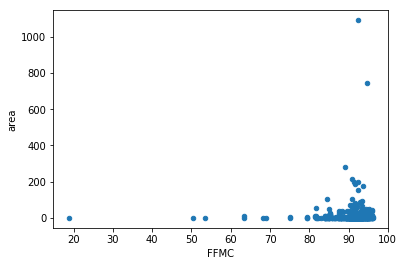

In [3]:
#scatter plot for FFMC and area
df.plot.scatter(x='FFMC', y='area')

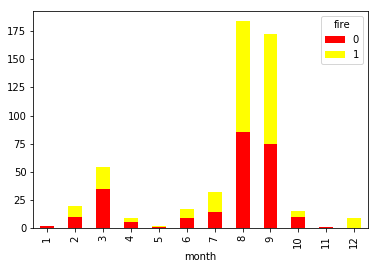

In [4]:
#Stacked bar graph for fire by month
month_bar = pd.crosstab(df_missing['month'], df_missing['fire'])
month_bar.plot(kind='bar', stacked=True, color=['red', 'yellow'], grid=False)

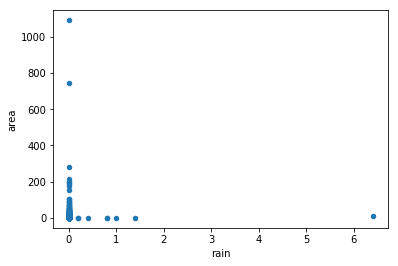

In [5]:
#scatter plot for rain and area
df.plot.scatter(x='rain', y='area')

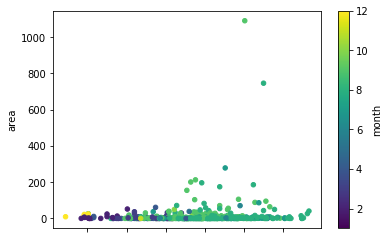

In [6]:
#scatter plot for temperature and area
df.plot.scatter(x='temp', y='area', c='month', colormap='viridis')

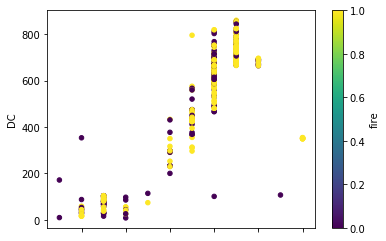

In [7]:
#scatter plot for month and DC by fire
df_missing.plot.scatter(x='month', y='DC', c='fire', colormap='viridis')

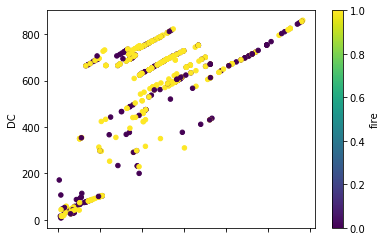

In [8]:
#scatter plot for DC and DMC by fire
df_missing.plot.scatter(x='DMC', y='DC', c='fire', colormap='viridis')

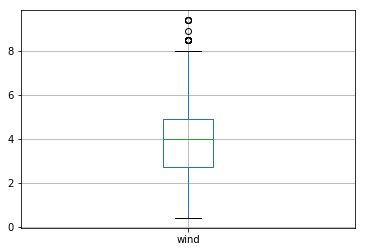

In [9]:
df.boxplot(column="wind")

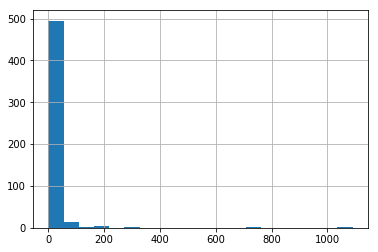

In [10]:
#histogram of area values in first data set shows skew
df['area'].hist(bins=20)

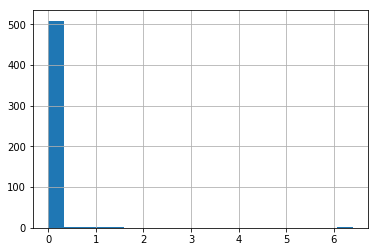

In [11]:
#histogram of rain values in second data set shows skew
df_missing['rain'].hist(bins=20)

In [12]:
df.describe()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [13]:
df_missing.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     2
DMC      3
DC       2
ISI      3
temp     1
RH       3
wind     1
rain     2
fire     0
dtype: int64

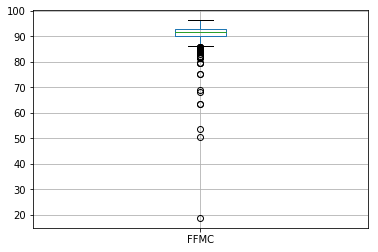

In [14]:
#boxplot of FMMC values in first data set for outliers and extreme values
df.boxplot(column="FFMC")

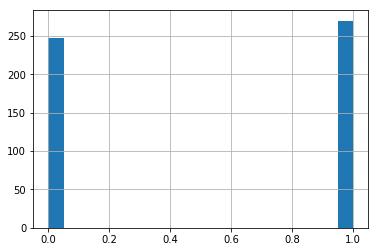

In [15]:
#bar graph of fire attribute in second data set
df_missing['fire'].hist(bins=20)